In [ ]:
pip install torch torchvision torchaudio matplotlib numpy pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

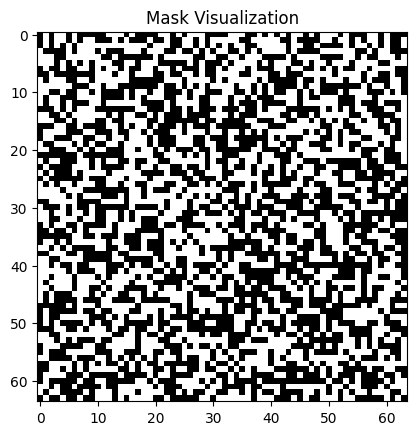

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Simulated image patch (e.g., from satellite data)
dummy_image = torch.rand(1, 13, 64, 64)  # 13 channels (Sentinel-2), 64x64 pixels

# Simulate a binary mask (1: keep, 0: mask out)
def generate_mask(shape, mask_ratio=0.5):
    total_patches = shape[2] * shape[3]
    num_masked = int(mask_ratio * total_patches)
    mask = torch.ones(total_patches)
    mask[:num_masked] = 0
    mask = mask[torch.randperm(total_patches)].view(shape[2], shape[3])
    return mask

mask = generate_mask(dummy_image.shape)
plt.imshow(mask, cmap='gray')
plt.title("Mask Visualization")
plt.show()

In [ ]:
class DummyEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(13, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
        )
    def forward(self, x):
        return self.encoder(x)

class DummyDecoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 13, kernel_size=3, padding=1),
        )
    def forward(self, x):
        return self.decoder(x)

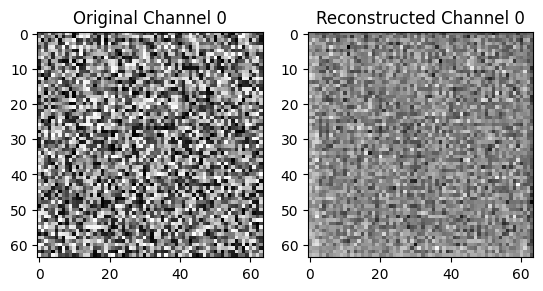

In [ ]:
encoder = DummyEncoder()
decoder = DummyDecoder()

# Apply mask to dummy image
masked_input = dummy_image.clone()
masked_input[:, :, mask == 0] = 0  # Zero out masked pixels

# Encode and decode
encoded = encoder(masked_input)
reconstructed = decoder(encoded)

# Show a single channel of output
plt.subplot(1, 2, 1)
plt.imshow(dummy_image[0, 0].detach(), cmap='gray')
plt.title("Original Channel 0")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed[0, 0].detach(), cmap='gray')
plt.title("Reconstructed Channel 0")

plt.show()
